In [1]:
from matplotlib.pylab import plt
import pandas as pd

In [2]:
def plot_loglog(df,measure = "time",label="",color="red"):
    plt.xlabel('log (number of datapoints)')
    plt.ylabel('log(time) (s)')
    plt.loglog(df["nPts"], df[measure],'-',label=label,color=color)
    

def plot_logx(df,measure="test",label="",color="red"):
    plt.xlabel('number of datapoints')
    plt.ylabel('time (s)')
    plt.plot(df["nPts"], df[measure],'-o',label=label,color=color)
    plt.xscale('log')


### Overall Benchmark

In [3]:
df_mpl = pd.read_csv("../result/matplotlib.csv")

In [4]:
df_altair = pd.read_csv("../result/baseline.csv")

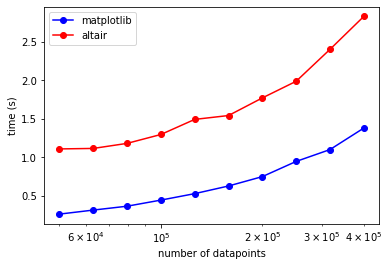

In [5]:
plot_logx(df_mpl,"t_recs", "matplotlib","blue")
plot_logx(df_altair,"t_recs", "altair","red")
plt.legend()

In [6]:
df = pd.read_csv("../result/1M_benchmark.csv")

Text(0.5, 1.0, 'Airbnb')

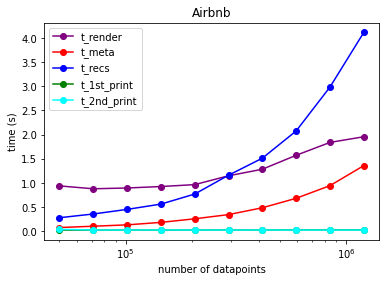

In [7]:
plot_logx(df,"t_render","t_render","purple")
plot_logx(df,"t_meta","t_meta","red")
plot_logx(df,"t_recs", "t_recs","blue")
plot_logx(df,"t_1st_print", "t_1st_print","green")
plot_logx(df,"t_2nd_print", "t_2nd_print","cyan")
plt.legend()
plt.title("Airbnb")

Text(0.5, 1.0, 'Airbnb')

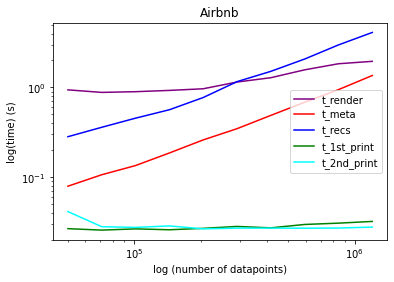

In [8]:
plot_loglog(df,"t_render","t_render","purple")
plot_loglog(df,"t_meta","t_meta","red")
plot_loglog(df,"t_recs", "t_recs","blue")
plot_loglog(df,"t_1st_print", "t_1st_print","green")
plot_loglog(df,"t_2nd_print", "t_2nd_print","cyan")
plt.legend()
plt.title("Airbnb")

When inspecting the loglog plot, all time increases exponentially, as a function of N. However, we will save the most by decreasing `t_recs`.

In [9]:
df = pd.read_csv("../result/baseline.csv")

Text(0.5, 1.0, 'Airbnb')

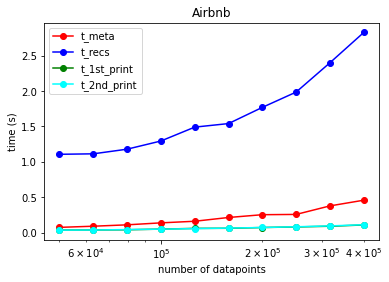

In [10]:
plot_logx(df,"t_meta","t_meta","red")
plot_logx(df,"t_recs", "t_recs","blue")
plot_logx(df,"t_1st_print", "t_1st_print","green")
plot_logx(df,"t_2nd_print", "t_2nd_print","cyan")
plt.legend()
plt.title("Airbnb")

Text(0.5, 1.0, 'Airbnb')

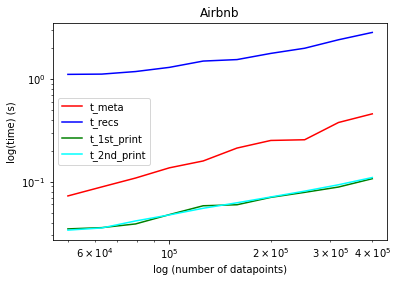

In [11]:
plot_loglog(df,"t_meta","t_meta","red")
plot_loglog(df,"t_recs", "t_recs","blue")
plot_loglog(df,"t_1st_print", "t_1st_print","green")
plot_loglog(df,"t_2nd_print", "t_2nd_print","cyan")
plt.legend()
plt.title("Airbnb")

### Vis Benchmark

In [12]:
df = pd.read_csv("../result/vis_benchmark.csv")
pdf = df.melt(id_vars=["nPts"],value_vars=['t_heatmap', 't_color_heatmap', 't_bar', 't_cbar', 't_hist','t_scatter', 't_color_scatter'], var_name="type", value_name='time')

In [13]:
import altair as alt
alt.Chart(pdf).mark_line().encode(
    x = "nPts:N",
    y = "time",
    color = "type:N"
)

alt.Chart(...)

In [139]:
alt.Chart(pdf).mark_bar().encode(
    x = "type:N",
    y = "time",
    color = "type:N",
    column = "nPts"
)

alt.Chart(...)

Text(0.5, 1.0, 'Vis Benchmark (Altair)')

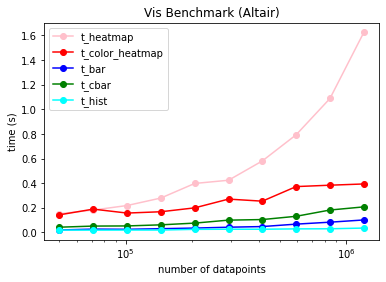

In [14]:
color = ["red","blue","green","cyan","purple","orange","teal","pink"]
cols = df.columns[1:-2]
for col,i in zip(cols,range(len(cols))):
    plot_logx(df,col,col,color[i-1])
plt.legend()
plt.title("Vis Benchmark (Altair)")

In [9]:
df = pd.read_csv("../result/vis_benchmark_1e7.csv")

Text(0.5, 1.0, 'Vis Benchmark (Altair)')

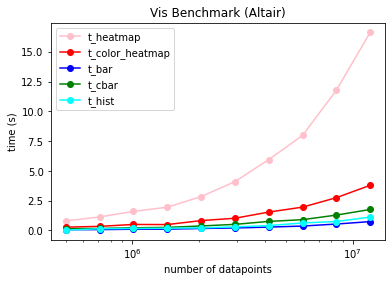

In [10]:
color = ["red","blue","green","cyan","purple","orange","teal","pink"]
cols = df.columns[1:]
for col,i in zip(cols,range(len(cols))):
    plot_logx(df,col,col,color[i-1])
plt.legend()
plt.title("Vis Benchmark (Altair)")

In [11]:
df

,nPts,t_heatmap,t_color_heatmap,t_bar,t_cbar,t_hist
0,499999,0.799979,0.277612,0.065718,0.146245,0.028324
1,711748,1.135584,0.344023,0.071085,0.165135,0.146277
2,1013173,1.601936,0.503506,0.101383,0.223186,0.164518
3,1442249,1.952182,0.493806,0.111147,0.257380,0.187138
4,2053039,2.843172,0.827417,0.165611,0.377094,0.212952
5,2922496,4.098198,1.024724,0.208825,0.512294,0.300058
6,4160167,5.950610,1.542389,0.281489,0.758309,0.408150
7,5921989,7.978258,1.958223,0.368942,0.905254,0.629519
8,8429939,11.769294,2.751203,0.538363,1.289805,0.750785
9,12000000,16.626975,3.790798,0.743197,1.760285,1.119721
